<a href="https://colab.research.google.com/github/amir-baradaran/Histogram-Equalization-Implementation-from-Scratch/blob/main/HW1CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [ ]:
class Gray_Image:

  def Gray_convert(self, Image):
    Image_Shape = Image.shape
    print("ابعاد تصویر اصلی(Height x Width x Channel):", Image_Shape)
    if Image_Shape[2] == 4:   # If the image has an alpha channel, remove it
      Image = Image[:, :, :3]

    # Convert to float for calculations
    img_float = Image.astype(float)

    # Convert to grayscale using standard formula
    # Gray = 0.2989*R + 0.5870*G + 0.1140*B
    gray = 0.2989 * img_float[:, :, 0] + 0.5870 * img_float[:, :, 1] + 0.1140 * img_float[:, :, 2]

    # Convert to 8-bit (0 to 255)
    gray_8bit = gray.astype(np.uint8)
    print()
    print("ابعاد تصویر خاکستری(Height x Width x Channel):", gray_8bit.shape)
    # Display the grayscale image
    plt.imshow(gray_8bit, cmap='gray')
    plt.title("تصویر تبدیل شده به خاکستری")
    plt.axis('off')
    plt.show()

    return gray_8bit


In [ ]:
class Gamma_correction(Gray_Image):
  def Gamma_corr(self, Gray_Img, Gamma):
    #Normlize gray image to 0-1
    gray_norm = Gray_Img.astype(float)/255.0

    #Gamma correction
    bright_img = gray_norm ** Gamma

    # Convert back to 8-bit
    bright_img_8bit = np.clip(bright_img * 255, 0, 255).astype(np.uint8)

    # Display image
    plt.imshow(bright_img_8bit, cmap = "gray")
    plt.title("تصویر با تبدیل گاما")
    plt.axis('off')
    return bright_img_8bit


In [ ]:
class Histogram_equalization(Gamma_correction):
  def Hist_equal(self, img_Gamma_correction):
    # Ensure image is float in [0,255]
    if img_Gamma_correction.dtype != np.uint8:
      img = (255 * img_Gamma_correction / np.max(img_Gamma_correction)).astype(np.uint8)
    else:
      img = img_Gamma_correction.copy()

    # If it's a color image -> apply equalization per channel
    if img.ndim == 3 and img.shape[2] == 3:
      eq_img = np.zeros_like(img)
      for c in range(3):
        flat = img[:, :, c].flatten()
        hist = np.bincount(flat, minlength = 256)
        pdf = hist/np.sum(hist)
        cdf = np.cumsum(pdf)
        equalized_values = np.floor(cdf * 255).astype(np.uint8)
        eq_img = equalized_values[flat].reshape(img[:, :, c].shape)

    else:
      flat = img.flatten()
      hist = np.bincount(flat, minlength = 256)
      pdf = hist/np.sum(hist)
      cdf = np.cumsum(pdf)
      equalized_values = np.floor(cdf * 255).astype(np.uint8)
      eq_img = equalized_values[flat].reshape(img.shape)

    #Visualization
    plt.figure(figsize = (12, 6))


    plt.subplot(2, 2, 1)
    plt.imshow(img if img.ndim == 3 else img, cmap='gray')
    plt.title("Orginal Image")
    plt.axis("off")

    plt.subplot(2, 2, 2)
    plt.imshow(eq_img if eq_img.ndim==3 else eq_img, cmap='gray')
    plt.title("Equalized Image")
    plt.axis("off")

    plt.subplot(2, 2, 3)
    plt.hist(img.ravel(), bins=256, color='gray')
    plt.title("Original Histogram")

    plt.subplot(2,2,4)
    plt.hist(eq_img.ravel(), bins=256, color='gray')
    plt.title("Equalized Histogram")

    plt.tight_layout()
    plt.show()

    return eq_img



In [ ]:
# آپلود تصویر از کامپیوتر
n = 3
file_names = {}
for i in range(3):
    uploaded = files.upload()  # آپلود فایل
    file_names[f"file_name_{i}"] = list(uploaded.keys())[0]

Saving مرکاوا-مارک4.jpg to مرکاوا-مارک4.jpg


Saving lena-blur.png to lena-blur.png


Saving هرمس 450.jpg to هرمس 450.jpg


In [ ]:
def Imshow(filename):
  img2 = mpimg.imread(filename)
  plt.imshow(img2)
  plt.axis('off')
  plt.show()
  return img2

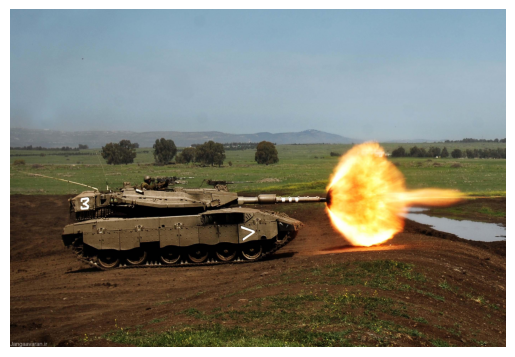

In [ ]:
Merkava_img = Imshow(file_names["file_name_0"])

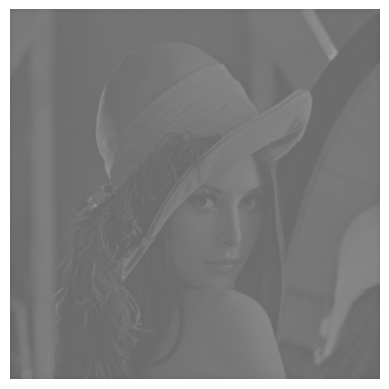

In [ ]:
Lena_img = Imshow(file_names["file_name_1"])

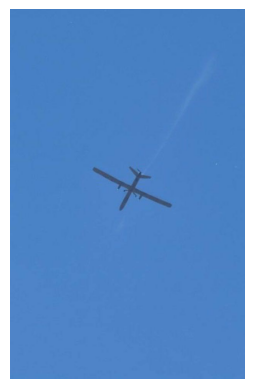

In [ ]:
Hermes_img = Imshow(file_names["file_name_2"])

ابعاد تصویر اصلی(Height x Width x Channel): (1898, 2789, 3)

ابعاد تصویر خاکستری(Height x Width x Channel): (1898, 2789)


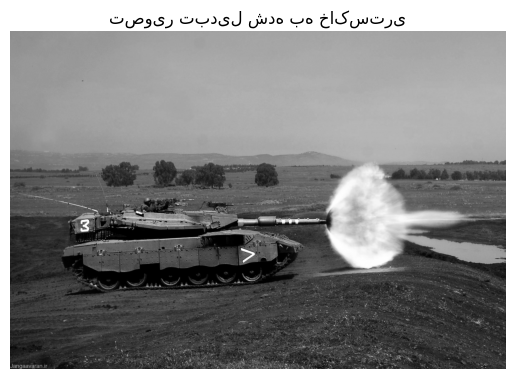

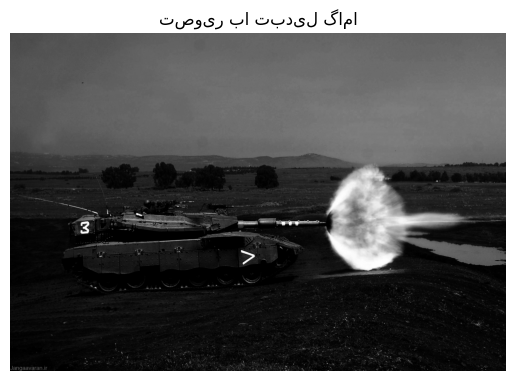

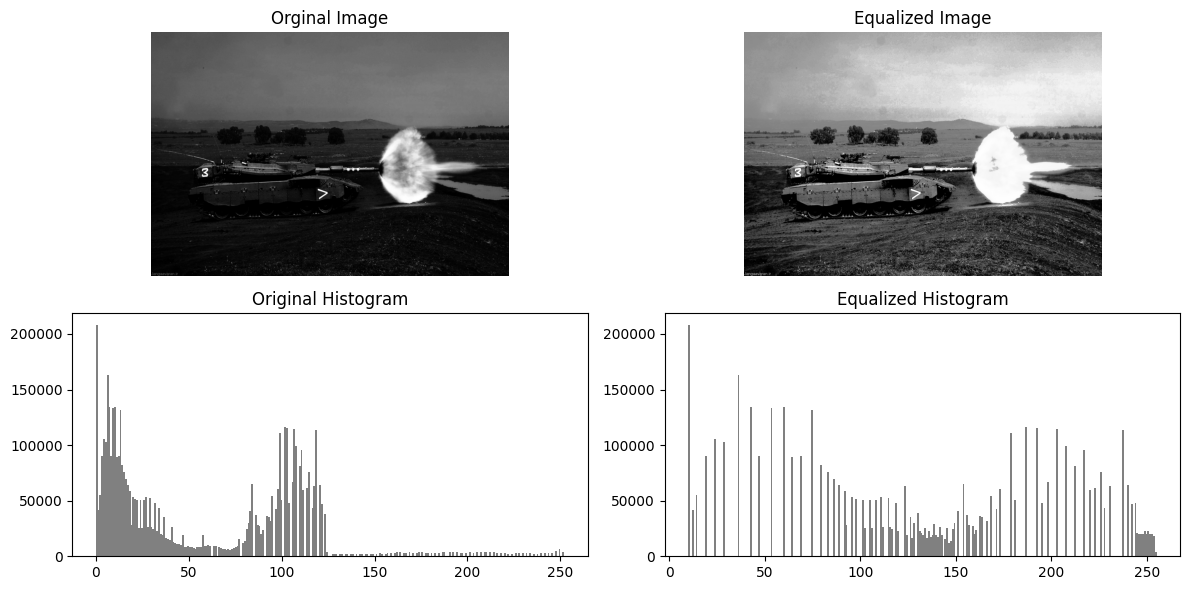

array([[143, 143, 143, ..., 179, 179, 179],
       [143, 143, 143, ..., 179, 179, 179],
       [143, 143, 143, ..., 179, 179, 179],
       ...,
       [ 14,  14,  12, ...,  54,  54,  54],
       [ 14,  14,  14, ...,  47,  47,  47],
       [ 19,  19,  19, ...,  47,  47,  47]], dtype=uint8)

In [ ]:
H = Histogram_equalization()
Gray_merkava = H.Gray_convert(Merkava_img)
Gamma_corr_merkava = H.Gamma_corr(Gray_merkava, 2.1)
H.Hist_equal(Gamma_corr_merkava)

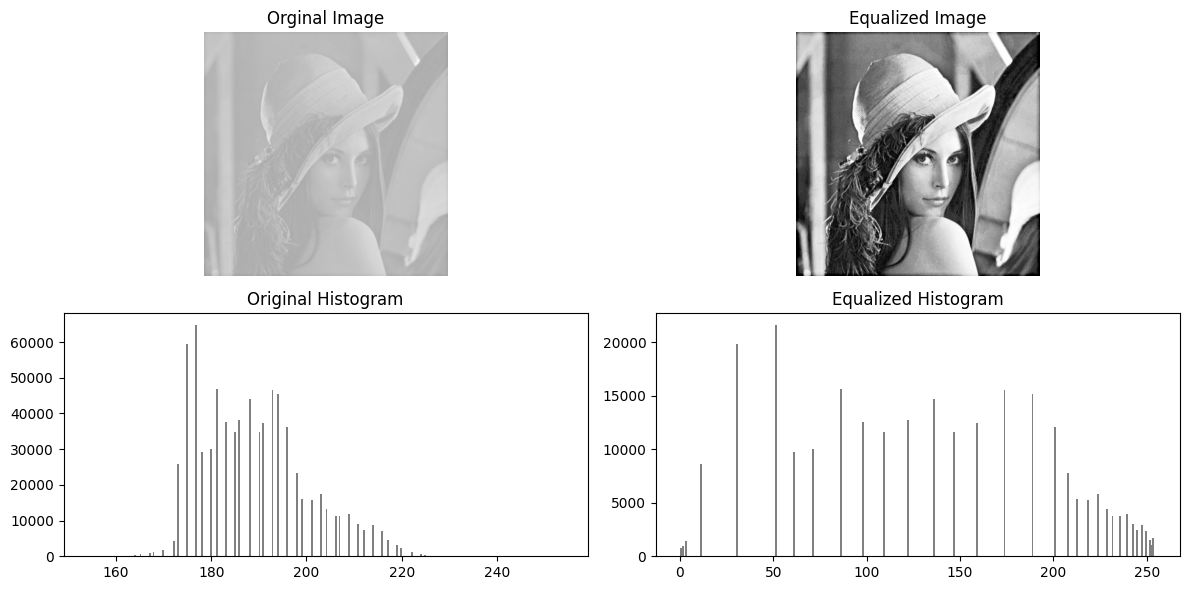

array([[51, 51, 71, ..., 71, 30,  1],
       [51, 71, 86, ..., 86, 51,  1],
       [71, 86, 98, ..., 98, 61,  3],
       ...,
       [ 0,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)
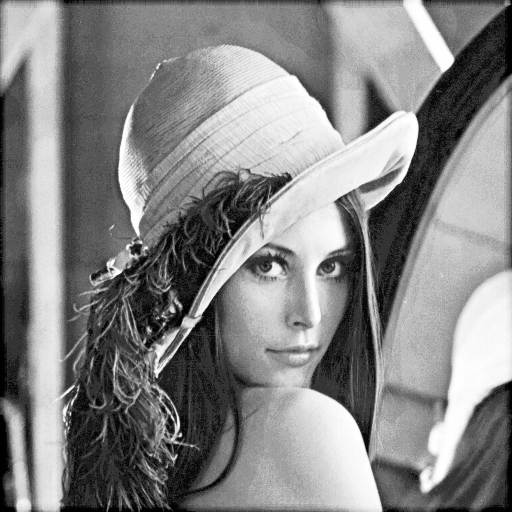

In [ ]:
H.Hist_equal(Lena_img)

ابعاد تصویر اصلی(Height x Width x Channel): (966, 612, 3)

ابعاد تصویر خاکستری(Height x Width x Channel): (966, 612)


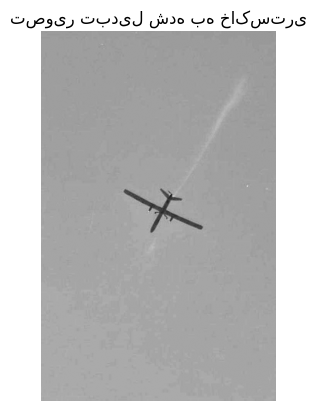

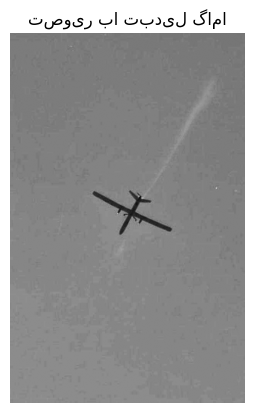

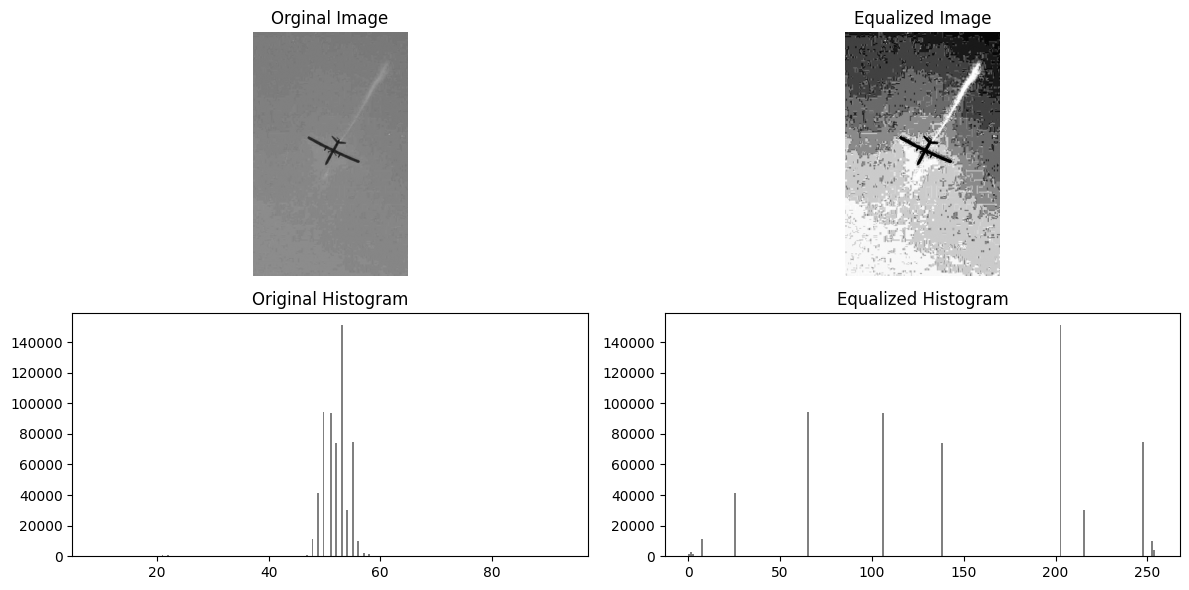

array([[ 25,  25,  25, ...,   7,   7,   7],
       [ 25,  25,  25, ...,   7,   7,   7],
       [ 25,  25,  25, ...,   7,   7,   7],
       ...,
       [253, 248, 248, ..., 203, 203, 203],
       [253, 248, 248, ..., 203, 203, 203],
       [253, 248, 248, ..., 203, 203, 203]], dtype=uint8)
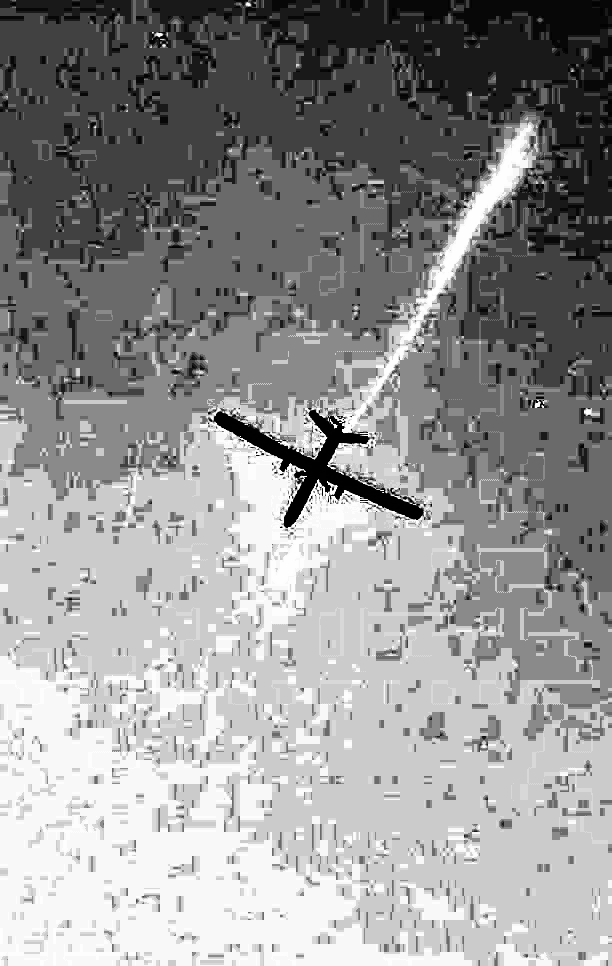

In [ ]:
H = Histogram_equalization()
Gray_hermes = H.Gray_convert(Hermes_img)
Gamma_corr_merkava = H.Gamma_corr(Gray_hermes, 2.1)
H.Hist_equal(Gamma_corr_merkava)